### 10botics Chiense Character Classification Competition (STUDENT VERSION)
Billy Hau (7/22/2022)

Kaggle Competition Link
<br>
<a href='https://www.kaggle.com/t/b25101f8db37457b93f26800b0bfb110'>https://www.kaggle.com/t/b25101f8db37457b93f26800b0bfb110</a>

<br>
Submission CSV Format
<br>
<br>
<table>
<tr>
    <th>id</th>
    <th>character</th>
</tr>
<tr>
    <td>0</td>
    <td>万</td>
</tr>
<tr>
    <td>1</td>
    <td>千</td>
</tr>
<tr>
    <td>2</td>
    <td>亿</td>
</tr>
<tr>
    <td>...</td>
    <td>...</td>
</tr>

In [115]:
# Install Nature Sort Library (natsort)
# !pip install natsort

discover_other_daemon: 1Requirement already satisfied: natsort in /home/wcyat/dev/kaggle/code/venv/lib/python3.10/site-packages (8.1.0)


In [116]:
# Import Libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
# import natsort;
import glob;
from PIL import Image;
from sklearn.model_selection import train_test_split;
from tensorflow import keras
import tensorflow as tf

In [117]:
# Load Training Labels
df_train = pd.read_csv('train.csv')
df_train


,id,character
0,0,四
1,1,十
2,2,一
3,3,万
4,4,四
...,...,...
11995,11995,千
11996,11996,四
11997,11997,万
11998,11998,亿


In [118]:
# Get Training Image Path
# img_path_train = glob.glob('train_img/*.jpg')
# img_path_train

In [119]:
# Sort the Training Image Path
# img_path_train = natsort.natsorted(img_path_train)
# img_path_train

In [120]:
# Get Training Image Path and Sort
img_path_test = glob.glob('test_img/*.jpg')
# img_path_test = natsort.natsorted(img_path_test)
img_path_test

['test_img/0.jpg',
 'test_img/1.jpg',
 'test_img/2.jpg',
 'test_img/3.jpg',
 'test_img/4.jpg',
 'test_img/5.jpg',
 'test_img/6.jpg',
 'test_img/7.jpg',
 'test_img/8.jpg',
 'test_img/9.jpg',
 'test_img/10.jpg',
 'test_img/11.jpg',
 'test_img/12.jpg',
 'test_img/13.jpg',
 'test_img/14.jpg',
 'test_img/15.jpg',
 'test_img/16.jpg',
 'test_img/17.jpg',
 'test_img/18.jpg',
 'test_img/19.jpg',
 'test_img/20.jpg',
 'test_img/21.jpg',
 'test_img/22.jpg',
 'test_img/23.jpg',
 'test_img/24.jpg',
 'test_img/25.jpg',
 'test_img/26.jpg',
 'test_img/27.jpg',
 'test_img/28.jpg',
 'test_img/29.jpg',
 'test_img/30.jpg',
 'test_img/31.jpg',
 'test_img/32.jpg',
 'test_img/33.jpg',
 'test_img/34.jpg',
 'test_img/35.jpg',
 'test_img/36.jpg',
 'test_img/37.jpg',
 'test_img/38.jpg',
 'test_img/39.jpg',
 'test_img/40.jpg',
 'test_img/41.jpg',
 'test_img/42.jpg',
 'test_img/43.jpg',
 'test_img/44.jpg',
 'test_img/45.jpg',
 'test_img/46.jpg',
 'test_img/47.jpg',
 'test_img/48.jpg',
 'test_img/49.jpg',
 'test_img

In [121]:
img_path_test = sorted(img_path_test, key=lambda i: int("".join(filter(lambda a: a.isdigit(), i))))


In [122]:
# Random Sample 5 Training Images and Print the Character
# index_list = np.random.randint(0, len(img_path_train), 5)

"""for i in index_list:
    display(Image.open(img_path_train[i]))
    print(df_train['character'][i])"""

"for i in index_list:\n    display(Image.open(img_path_train[i]))\n    print(df_train['character'][i])"

In [123]:
# Construct a List of Image Array for the Training Dataset (X_train)
from keras.utils import image_dataset_from_directory

X_train = image_dataset_from_directory(
    'train_img/train/',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

X_valid = image_dataset_from_directory(
    'train_img/valid/',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

# Convert into Numpy Array
# X_train = np.array(X_train))

# Construct a List of Image Array for the Training Dataset (X_test)
X_test = [np.array(Image.open(path)) for path in img_path_test]

# Convert into Numpy Array
X_test = np.array(X_test)

# Data Pipeline


def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
X_train = (
    X_train
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
X_valid = (
    X_valid
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 9600 files belonging to 15 classes.
Found 2400 files belonging to 15 classes.


Let's flatten the image to feed into the ML models...

<img src='https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png' width='300px'>

In [124]:
# Reshape X_train and X_test into 2D arrays... they will be an array of flattened (1D) images
# print(X_train.shape)
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [125]:
# Get Y_train after One Hot Encoding and Setting the Column Names
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
Y_train = encoder.fit_transform(df_train['character'].values.reshape(-1, 1))
Y_train = pd.DataFrame(Y_train)
Y_train.columns = encoder.categories_
Y_train

,一,七,万,三,九,二,五,亿,八,六,十,千,四,百,零
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# Import ML Libraries
import tensorflow as tf
from tensorflow import keras

In [127]:
pretrained_base = tf.keras.models.load_model(
    './vgg16-pretrained-base',
)
pretrained_base.trainable = False

In [146]:
# Build Model - reference class presentation if need help selecting layers

# input = keras.Input(X_train.shape)

# x = keras.layers.Dense(256, activation='elu')(input)
# for i in range(0, 5):
#    x = keras.layers.BatchNormalization()(x)
#    x = keras.layers.Dropout(0.4)(x)
#    x = keras.layers.Dense(256, activation='elu')(x)

model = keras.Sequential([
    # pretrained_base,
    keras.layers.Input(shape=(128, 128, 3)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(Y_train.shape[1], activation='softmax')
])

# output = keras.layers.Dense(Y_train.shape[1], activation='softmax')(x)

# model = keras.Model(inputs=input, outputs=output)


In [147]:
# Compile Model (Adam / Categorical Cross Entrophy / Categorical Accuracy)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [130]:
# x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [148]:
# Train Model
earlyStop = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=10, restore_best_weights=True,     min_delta=0.001,
                                          )
history = model.fit(X_train, epochs=1000, callbacks=[
                    earlyStop], validation_data=X_valid)


Epoch 1/1000
 20/150 [===>..........................] - ETA: 1:16 - loss: 2.6608 - categorical_accuracy: 0.1266

KeyboardInterrupt: 

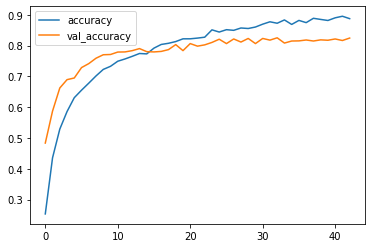

In [ ]:
# Plot model accuracy and evaluate the model... are you overfitted? Underfitted?
# Try adding Dropout and BatchNormalization to avoid overfitting
# Try adding more "complexity" to get a better fit (aka layes and nodes)

plt.plot(history.history['categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend()

5/5 [==============================] - 0s 33ms/step
true: ('零',) 	 predict: ('零',)
true: ('零',) 	 predict: ('零',)
true: ('十',) 	 predict: ('十',)
true: ('三',) 	 predict: ('三',)
true: ('万',) 	 predict: ('六',)
true: ('亿',) 	 predict: ('亿',)
true: ('九',) 	 predict: ('九',)
true: ('二',) 	 predict: ('二',)
true: ('亿',) 	 predict: ('六',)
true: ('二',) 	 predict: ('一',)


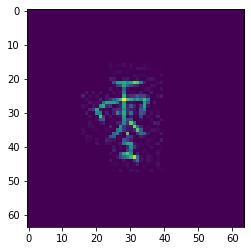

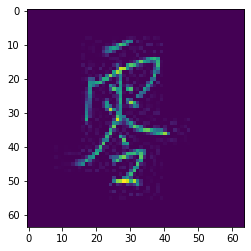

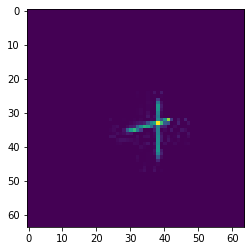

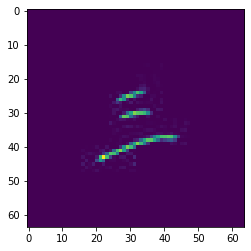

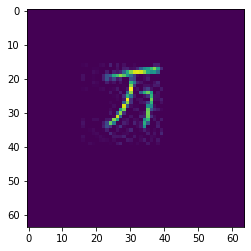

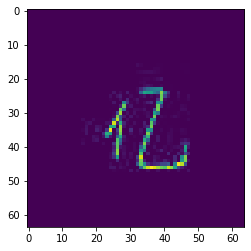

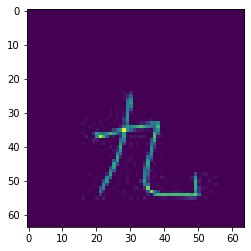

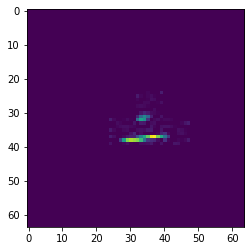

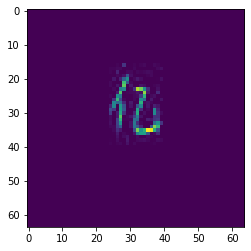

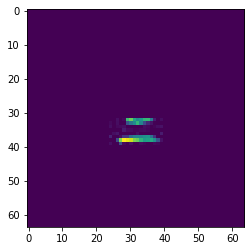

In [ ]:
# Let's do a prediction over X_val and see how the model do

prediction = model.predict(x_val,batch_size=512)

index_list = np.random.randint(0, len(x_val), 10)

for id in index_list:
    plt.figure()
    plt.imshow(x_val[id].reshape((64,64)))
    print(f'true: {y_train.columns[np.argmax(y_val.iloc[id])]} \t predict: {y_train.columns[np.argmax(prediction[id])]}')


In [ ]:
# Run the Model on the Testing Dataset
prediction_test = model.predict(X_test, batch_size=4096)


1/1 [==============================] - 0s 116ms/step


In [ ]:
# Let's Check the Shape of the Prediction and Somehow get it into Submission Format
prediction_test.shape

(3000, 15)

In [ ]:
# Find the Index of the Most Likely Column for each Row
prediction_test2 = np.argmax(prediction_test, axis=1)
prediction_test2

array([ 0,  9,  8, ..., 13, 12,  6])

In [ ]:
# Now, need to transform these index into column names
prediction_test3 = []

for id in prediction_test2:
    prediction_test3.append(y_train.columns[id])

In [ ]:
# let's Preview the List
prediction_test3

[('一',),
 ('六',),
 ('八',),
 ('五',),
 ('六',),
 ('三',),
 ('十',),
 ('百',),
 ('千',),
 ('八',),
 ('八',),
 ('八',),
 ('千',),
 ('七',),
 ('八',),
 ('千',),
 ('万',),
 ('七',),
 ('万',),
 ('一',),
 ('万',),
 ('一',),
 ('亿',),
 ('一',),
 ('亿',),
 ('二',),
 ('五',),
 ('九',),
 ('二',),
 ('十',),
 ('二',),
 ('万',),
 ('二',),
 ('三',),
 ('亿',),
 ('十',),
 ('一',),
 ('九',),
 ('五',),
 ('零',),
 ('一',),
 ('三',),
 ('三',),
 ('九',),
 ('二',),
 ('九',),
 ('百',),
 ('二',),
 ('六',),
 ('千',),
 ('百',),
 ('三',),
 ('九',),
 ('零',),
 ('千',),
 ('四',),
 ('八',),
 ('千',),
 ('百',),
 ('百',),
 ('一',),
 ('一',),
 ('三',),
 ('二',),
 ('零',),
 ('百',),
 ('九',),
 ('一',),
 ('三',),
 ('六',),
 ('六',),
 ('百',),
 ('九',),
 ('零',),
 ('六',),
 ('亿',),
 ('七',),
 ('四',),
 ('五',),
 ('七',),
 ('亿',),
 ('百',),
 ('四',),
 ('九',),
 ('七',),
 ('七',),
 ('六',),
 ('千',),
 ('千',),
 ('四',),
 ('亿',),
 ('千',),
 ('一',),
 ('百',),
 ('六',),
 ('百',),
 ('六',),
 ('三',),
 ('七',),
 ('一',),
 ('百',),
 ('三',),
 ('二',),
 ('零',),
 ('四',),
 ('千',),
 ('亿',),
 ('千',),
 ('万',),
 ('九',),
 ('十',),
 

In [ ]:
# Put this into a DataFrame and Format for Export
df_kaggle = pd.DataFrame(prediction_test3, columns=['character'])
df_kaggle.index.name = 'id'
df_kaggle


,character
id,
0,一
1,六
2,八
3,五
4,六
...,...
2995,千
2996,四
2997,百


In [ ]:
# Export DataFrame for Kaggle Grade
df_kaggle.to_csv('kaggle_submission.csv', index=True)